In [2]:
import pandas as pd
import numpy as np

In [19]:
import ast
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

In [20]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173841e-02 -4.28515114e-02 -1.56285875e-02  1.40537489e-02
  3.95537615e-02  1.21796228e-01  2.94333678e-02 -3.17524411e-02
  3.54959704e-02 -7.93139711e-02  1.75878573e-02 -4.04369682e-02
  4.97259311e-02  2.54912134e-02 -7.18701035e-02  8.14968795e-02
  1.47070014e-03  4.79627065e-02 -4.50336337e-02 -9.92174819e-02
 -2.81769559e-02  6.45046383e-02  4.44670282e-02 -4.76217009e-02
 -3.52952331e-02  4.38671745e-02 -5.28566279e-02  4.33066190e-04
  1.01921506e-01  1.64072253e-02  3.26996744e-02 -3.45986709e-02
  1.21339420e-02  7.94871226e-02  4.58341558e-03  1.57778338e-02
 -9.68206860e-03  2.87625808e-02 -5.05805872e-02 -1.55793615e-02
 -2.87906546e-02 -9.62279644e-03  3.15556638e-02  2.27349009e-02
  8.71449485e-02 -3.85027304e-02 -8.84718150e-02 -8.75503290e-03
 -2.12343168e-02  2.08923612e-02 -9.02077630e-02 -5.25732003e-02
 -1.05638802e-02  2.88310610e-02 -1.61454864e-02  6.17838046e-03
 -1.23234

In [29]:
cot_sentences_ex = gsm_df['CoT Sentences'][0]
cot_sentences_ex

["First, let's calculate how many clips Natalia sold in May.",
 'We know that she sold half as many clips in May as she did in April.',
 'So, we can find this by dividing the number of clips she sold in April by 2.',
 '48 clips / 2 = 24 clips\n\nTherefore, Natalia sold 24 clips in May.',
 "Now, let's calculate how many clips she sold altogether in April and May.",
 'We can find this by adding the number of clips she sold in April and the number of clips she sold in May.',
 '48 clips + 24 clips = 72 clips\n\nTherefore, Natalia sold a total of 72 clips in April and May.']

In [30]:
gsm_df.head()

,Prompt,CoT Response,Answer,CoT Sentences
0,Natalia sold clips to 48 of her friends in Apr...,"First, let's calculate how many clips Natalia ...",Natalia sold 48/2 = <<48/2=24>>24 clips in May...,"[First, let's calculate how many clips Natalia..."
1,Weng earns $12 an hour for babysitting. Yester...,"To find out how much Weng earned, we need to c...",Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...,"[To find out how much Weng earned, we need to ..."
2,Betty is saving money for a new wallet which c...,1. The cost of the wallet is $100.\n2. Betty h...,"In the beginning, Betty has only 100 / 2 = $<<...","[1., The cost of the wallet is $100., 2., Bett..."
3,"Julie is reading a 120-page book. Yesterday, s...",Step 1: Calculate how many pages Julie has rea...,Maila read 12 x 2 = <<12*2=24>>24 pages today....,[Step 1: Calculate how many pages Julie has re...
4,James writes a 3-page letter to 2 different fr...,To find the number of pages James writes in a ...,He writes each friend 3*2=<<3*2=6>>6 pages a w...,[To find the number of pages James writes in a...


In [34]:
cot_embeddings = model.encode(cot_sentences_ex)

In [38]:
len(cot_embeddings[0])

384

In [36]:
type(cot_embeddings)

numpy.ndarray

Embedding Visualization

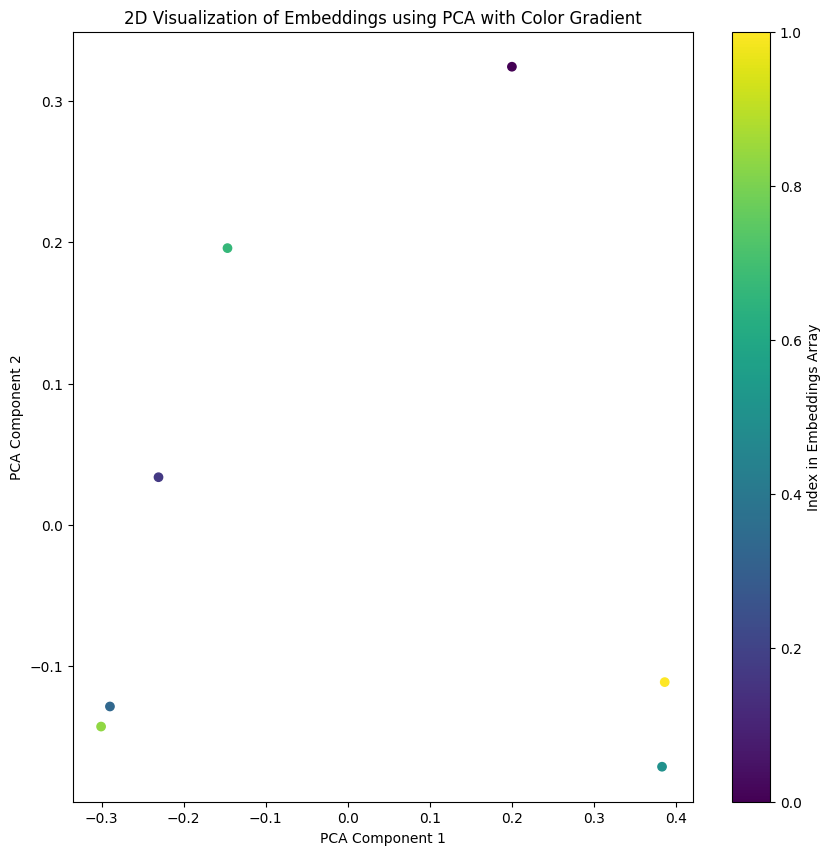

In [44]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming cot_embeddings is your numpy array of embeddings
embeddings = cot_embeddings

# Apply PCA and reduce to two dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Generate a range of colors based on the index of each embedding
indices = np.arange(len(embeddings))
normalized_indices = indices / max(indices)  # Normalize to [0, 1]

# Choose a colormap
colormap = plt.cm.viridis

# Apply the colormap
colors = colormap(normalized_indices)

# Plot with colors
plt.figure(figsize=(10, 10))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors)

# Create a colorbar with the colormap
plt.colorbar(scatter, label='Index in Embeddings Array')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Embeddings using PCA with Color Gradient')
plt.show()

In [42]:
for i, sent in enumerate(cot_sentences_ex):
    print(i, sent)

0 First, let's calculate how many clips Natalia sold in May.
1 We know that she sold half as many clips in May as she did in April.
2 So, we can find this by dividing the number of clips she sold in April by 2.
3 48 clips / 2 = 24 clips

Therefore, Natalia sold 24 clips in May.
4 Now, let's calculate how many clips she sold altogether in April and May.
5 We can find this by adding the number of clips she sold in April and the number of clips she sold in May.
6 48 clips + 24 clips = 72 clips

Therefore, Natalia sold a total of 72 clips in April and May.


In [39]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming cot_embeddings is your numpy array of embeddings
# You can check its shape to ensure it's 2D (samples, features)
print("Embeddings shape:", cot_embeddings.shape)

# Apply t-SNE transformation
# You can adjust parameters like perplexity and n_iter for better results
tsne = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=300)
tsne_results = tsne.fit_transform(cot_embeddings)

plt.figure(figsize=(12,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE Visualization of Embeddings')
plt.show()

Embeddings shape: (7, 384)


ValueError: perplexity must be less than n_samples